In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
df = pd.read_csv("Walmart.csv")   
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [37]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')


In [39]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)


In [41]:
df['Sales_Lag1'] = df['Weekly_Sales'].shift(1)
df['Sales_Lag2'] = df['Weekly_Sales'].shift(2)


In [43]:
df['Sales_Rolling3'] = df['Weekly_Sales'].shift(1).rolling(window=3).mean()
df['Sales_Rolling7'] = df['Weekly_Sales'].shift(1).rolling(window=7).mean()
df = df.dropna()

In [45]:
features = ['Year', 'Month', 'Day', 'Week',
            'Sales_Lag1', 'Sales_Lag2',
            'Sales_Rolling3', 'Sales_Rolling7']

X = df[features]
y = df['Weekly_Sales']


In [47]:
split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [51]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [52]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


In [53]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> RMSE: {rmse:.2f}, R2: {r2:.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_gbr, "Gradient Boosting")


Linear Regression -> RMSE: 538016.78, R2: -0.02
Random Forest -> RMSE: 545542.95, R2: -0.05
Gradient Boosting -> RMSE: 546494.89, R2: -0.05


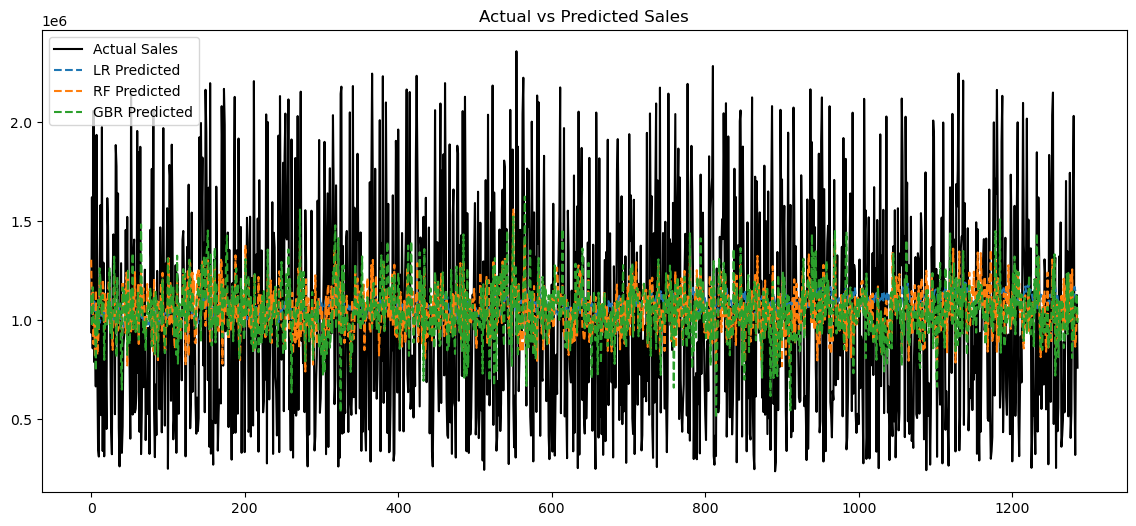

In [54]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual Sales", color="black")
plt.plot(y_pred_lr, label="LR Predicted", linestyle="--")
plt.plot(y_pred_rf, label="RF Predicted", linestyle="--")
plt.plot(y_pred_gbr, label="GBR Predicted", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

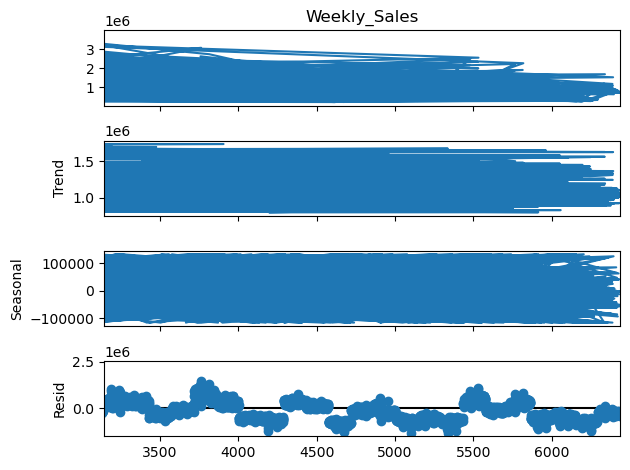

In [31]:
decomp = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)
decomp.plot()
plt.show()